In [14]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Ruta del archivo
ruta = "../data/processed/analisis_violencia.csv"

DF_violencia_mujer = pd.read_csv(
    ruta,
    encoding="cp1252",
    low_memory=False
)

In [16]:
DF_violencia_mujer

,violencia_infancia,violencia_pareja
0,0,1
1,0,1
2,1,0
3,1,0
4,0,0
...,...,...
10572,0,0
10573,1,1
10574,1,0
10575,1,0


In [17]:
# Cuenta las combinaciones posibles para ambas columnas
pd.crosstab(
    DF_violencia_mujer['violencia_infancia'],
    DF_violencia_mujer['violencia_pareja']
)

violencia_pareja,0,1
violencia_infancia,,
0,5411,956
1,2830,1380


In [18]:
# Porcentaje de las cobminaciones de ambas columnas
pd.crosstab(
    DF_violencia_mujer['violencia_infancia'],
    DF_violencia_mujer['violencia_pareja'],
    normalize = True
)*100

violencia_pareja,0,1
violencia_infancia,,
0,51.158173,9.038480
1,26.756169,13.047178


In [19]:
# Porcentaje de violencia en infancia
DF_violencia_mujer['violencia_infancia'].value_counts(normalize = True).mul(100).round(2)

violencia_infancia
0    60.2
1    39.8
Name: proportion, dtype: float64

In [20]:
# Porcentaje de violencia en pareja
DF_violencia_mujer['violencia_pareja'].value_counts(normalize = True).mul(100).round(2)

violencia_pareja
0    77.91
1    22.09
Name: proportion, dtype: float64

Insight
- Casos:
    - 5411: No sufrieron violencia ni en infancia ni en pareja (0,0)
    - 2830: Sufrieron violencia en infancia pero no en pareja (1,0)
    - 1380:Sufrieron violencia tanto en infancia como en pareja(1,1)
    - 956:No sufrieron violencia en infancia pero si en pareja (0,1)

- Casos:
    - 51% : No sufrieron violencia ni en infancia ni en pareja (0,0)
    - 26,7%: Sufrieron violencia en infancia pero no en pareja (1,0)
    - 13%:Sufrieron violencia tanto en infancia como en pareja(1,1)
    - 9%:No sufrieron violencia en infancia pero si en pareja (0,1)

Para continuar nuestra investigacion nos interesa el grupo (1,1) y (0,1) Porque:
- Nos centramos en el grupo de mujeres con pareja que sufren violencia o sufrieron con su pareja
- Comparamos las mujeres que sufren violencia con su pareja y tuvieron una infancia con violencia vs mujeres que sufren violencia con su pereja pero no tuvieron violencia en su infancia

In [21]:
# Probabilidad Condicional
# Probabilidad de violencia en la pareja si NO hubo violencia en la infancia 
# Mujeres SIN violencia en la infancia
Grup_sin_viol_infanc = DF_violencia_mujer[DF_violencia_mujer['violencia_infancia'] == 0]

# Probabilidad Condicional
probabilidad_vp_si_vi_no = (
    Grup_sin_viol_infanc['violencia_pareja'].mean() #El promedio de una variable binaria es exactamente una probabilidad
)

print(f"Probabilidad de surfrir violencia en pareja SIN presencia de violencia en infancia: {probabilidad_vp_si_vi_no.round(2)*100} %")

Probabilidad de surfrir violencia en pareja SIN presencia de violencia en infancia: 15.0 %


In [22]:
# Mujeres CON violencia en la infancia
Grup_con_viol_infanc = DF_violencia_mujer[DF_violencia_mujer['violencia_infancia'] == 1]

# Probabilidad Condicional
probabilidad_vp_si_vi_si = (
    Grup_con_viol_infanc['violencia_pareja'].mean() #El promedio de una variable binaria es exactamente una probabilidad
)

print(f"Probabilidad de surfrir violencia en pareja CON presencia de violencia en infancia: {probabilidad_vp_si_vi_si.round(2)*100} %")

Probabilidad de surfrir violencia en pareja CON presencia de violencia en infancia: 33.0 %


In [23]:
# Riesgo Relativo
riesgo_relativo = (probabilidad_vp_si_vi_si / probabilidad_vp_si_vi_no)
riesgo_relativo = riesgo_relativo.round(2)
print(f"Existen {riesgo_relativo} veces mas riesgo relativo que exista violencia en pareja si antes hubo violencia en infancia")

Existen 2.18 veces mas riesgo relativo que exista violencia en pareja si antes hubo violencia en infancia


Uso de Odds Ratio - para medir cuantas veces mas son las probabilidades(odds) de sufrir violencia en la pareja si hubo violencia en la infancia, comparado con no haberla tenido.

In [24]:
# Creamos tabla cruzada con los valores para el odds-ratio
tabla_cross = pd.crosstab(
    DF_violencia_mujer['violencia_infancia'],
    DF_violencia_mujer['violencia_pareja']
)

a = tabla_cross.loc[1, 1] # SI hubo Violencia tanto en infancia SI en pareja
b = tabla_cross.loc[1, 0] # SI hubo Violencia en infancia pero NO en pareja
c = tabla_cross.loc[0, 1] # NO hubo violencia en infancia pero SI en pareja
d = tabla_cross.loc[0, 0] # NO hubo violencia en infancia NO hubo en pareja

# Formula odds-ratio
odds_ratio = (a * d)/(b * c)
odds_ratio = round(odds_ratio, 2)
print(f"El odds ratio del evento donde existe presencia de violencia familiar es {odds_ratio} ")

El odds ratio del evento donde existe presencia de violencia familiar es 2.76 


El odds ratio es de 2.76, lo que indica que la probabilidad del evento en el grupo expuesto es casi 3 veces mayores probabilidades de sufrir violencia en la pareja en la adultez

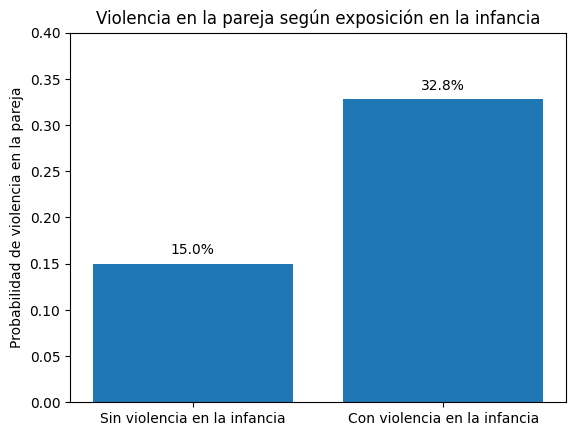

In [25]:
# Grafico 

# Consolidamos la inf. necesaria para graficar en un DF
data = pd.DataFrame({
    'Grupo': [
        'Sin violencia en la infancia',
        'Con violencia en la infancia'
    ],
    'Probabilidad': [
        probabilidad_vp_si_vi_no,
        probabilidad_vp_si_vi_si
    ]
})


# Grafica de Barras
plt.figure()
plt.bar(data['Grupo'], data['Probabilidad'])
plt.ylabel('Probabilidad de violencia en la pareja')
plt.ylim(0, 0.4)
plt.title('Violencia en la pareja según exposición en la infancia')

# Etiquetas encima de las barras
for i, v in enumerate(data['Probabilidad']):
    plt.text(i, v + 0.01, f'{v:.1%}', ha='center')

plt.show()